In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1: Работа с массивами NumPy

Цель: Проверить знание методов NumPy для анализа данных.

Задание:

Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
Найдите:
Среднее арифметическое массива.
Медиану.
Стандартное отклонение.
Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:

Вывод среднего, медианы, стандартного отклонения.
Новый массив и его фильтр.

In [3]:
# Создаем массив случайных чисел
random_array = np.random.randint(10, 101, size=50)

# Вычисляем среднее арифметическое
mean = np.mean(random_array)

# Вычисляем медиану
median = np.median(random_array)

# Вычисляем стандартное отклонение
std_dev = np.std(random_array)

# Создаем новый массив, где каждое число изначального массива делится на 3
new_array = random_array / 3

# Отфильтровываем числа, которые делятся без остатка
filtered_array = new_array[new_array % 1 == 0]

print("Среднее арифметическое:", mean)
print("Медиана:", median)
print("Стандартное отклонение:", std_dev)
print("Новый массив:", filtered_array)

Среднее арифметическое: 60.08
Медиана: 62.0
Стандартное отклонение: 24.199867768233776
Новый массив: [29. 18. 26. 19. 15.  8. 15. 25. 31. 22. 30. 20. 18. 25. 33.]


# Задание 2: Анализ данных с помощью Pandas

Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

date (дата продаж),
region (регион),
product (продукт),
sales (объем продаж).
Задание:

Загрузите данные из файла.
Определите:
Общее количество записей.
Какие регионы и продукты присутствуют в данных.
Подсчитайте:
Общие продажи по регионам.
Средний объем продаж для каждого продукта.
Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.


In [7]:
# загрузка данных
data = pd.read_csv("data/sales_data_large.csv")
display(data.head(5))
display(data.info())

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


None

In [9]:
print("Количество данных:", data.shape[0])
print("Список регионов:", data["region"].unique())
print("Список продуктов:", data["product"].unique())

Количество данных: 500
Список регионов: ['West' 'South' 'East' 'North']
Список продуктов: ['Widget C' 'Widget B' 'Widget A']


In [10]:
# общие продажи по регионам
data.groupby("region")["sales"].sum()

region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64

In [11]:
# средний объем продаж для каждого продукта
data.groupby("product")["sales"].mean()

product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64

In [12]:
# сводная таблица, показывающая средние продажи по регионам и продуктам
data.pivot_table(
    values="sales", index="region", columns="product", aggfunc="mean", fill_value=0
)

product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


# Задание 3: Очистка данных и визуализация

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.
Данные: Используйте предоставленный CSV-файл (sales_cleaning_large.csv), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:
date (дата продаж),
sales (объем продаж),
region (регион).
Задание:
Найдите и устраните ошибки в данных:
Заполните пропущенные даты.
Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
Заполните пропущенные значения в sales средним значением.
Постройте график продаж по датам. Убедитесь, что даты упорядочены.

In [14]:
# загрузка данных
data = pd.read_csv("data/sales_cleaning_large.csv")
display(data.head(5))
display(data.info())

,date,sales,region
0,2024-12-01,-450.0,East
1,2024-12-01,400.0,East
2,2024-12-01,-100.0,South
3,2024-12-01,350.0,West
4,2024-12-02,400.0,South


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


None

In [15]:
# преобразуем столбец с датой в формат datetime
data["date"] = pd.to_datetime(data["date"], errors="coerce")


# Найдем минимальную и максимальную дату
min_date = data["date"].min()
max_date = data["date"].max()

# Заполним пропущенные значения случайными датами в указанном диапазоне
data["date"] = data["date"].apply(lambda x: (x if pd.notnull(x) else pd.to_datetime(np.random.choice(pd.date_range(min_date, max_date)))))

In [17]:
# проверим, что пропусков больше нет
data["date"].isnull().sum()

0

In [18]:
# Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
# количество отрицательных значений до замены
data[data["sales"] < 0]['sales'].count()

89

In [19]:

# считаем медиану
median_sales = data[data["sales"] > 0]["sales"].median()

# заменяем отрицательные значения на медиану
data["sales"] = np.where(data["sales"] < 0, median_sales, data["sales"])

In [20]:
# количество отрицательных значений после замены
data[data["sales"] < 0]['sales'].count()

0

In [21]:
# Заполните пропущенные значения в sales средним значением.
data["sales"] = data["sales"].fillna(data["sales"].mean())
# проверим, что пропусков не осталось
data.isnull().sum()

date      0
sales     0
region    0
dtype: int64

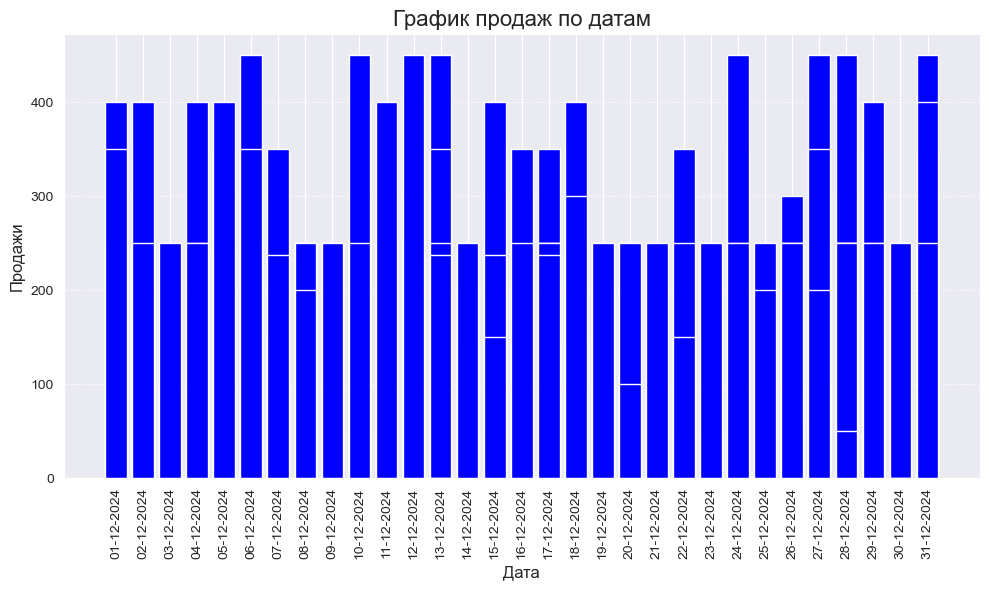

In [23]:
# Постройте график продаж по датам. Убедитесь, что даты упорядочены.
data["date"] = pd.to_datetime(data["date"])
data = data.sort_values(by="date")

plt.figure(figsize=(10, 6))
plt.bar(data["date"].dt.strftime("%d-%m-%Y"), data["sales"], color="blue")
plt.title("График продаж по датам", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Продажи", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Задание 4: Получение данных из API

Цель: Проверить способность работать с веб-данными.
Задание:
Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

In [24]:
import requests

url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(url)

# Преобразование данных в DataFrame
data2 = response.json()
df = pd.DataFrame(data2)

df.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [25]:
df = df[["id", "name", "email", "company"]]

# извлекаем название компании
df["company_name"] = df["company"].apply(lambda x: x["name"])

del df["company"]

# фильтрация пользователей, работающих в компаниях, название которых содержит слово "Group"
filtered_df = df[df["company_name"].str.contains("Group", case=False)]

filtered_df

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
